# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# 1446a4608374b4e9fd868d9d069db208
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# url = base_url + "appid=" + weather_api_key
#+ "&q="
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# url = "http://api.openweathermap.org/data/2.5/weather?appid=weather_api_key&q=units=metric"
# HELP!!!!!

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | port elizabeth


Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | tolga
Processing Record 5 of Set 1 | yaren
Processing Record 6 of Set 1 | ribeira brava
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | sarmanovo
Processing Record 9 of Set 1 | roma
Processing Record 10 of Set 1 | yeongam
City not found. Skipping...
Processing Record 11 of Set 1 | toliara
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | brezina
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | bethanie
Processing Record 16 of Set 1 | ulsteinvik
Processing Record 17 of Set 1 | tobelo
Processing Record 18 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | nova sintra
Processing Record 22 of Set 1 | charlotte
Processing Record 23 of Set 1 | haiku-pauwela
Processing 

In [4]:
city_weather

{'coord': {'lon': 75.9833, 'lat': 12.9833},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 70.66,
  'feels_like': 69.17,
  'temp_min': 70.66,
  'temp_max': 70.66,
  'pressure': 1017,
  'humidity': 37,
  'sea_level': 1017,
  'grnd_level': 911},
 'visibility': 10000,
 'wind': {'speed': 5.17, 'deg': 113, 'gust': 9.86},
 'clouds': {'all': 69},
 'dt': 1707498608,
 'sys': {'country': 'IN', 'sunrise': 1707441651, 'sunset': 1707483585},
 'timezone': 19800,
 'id': 1278953,
 'name': 'Alūr',
 'cod': 200}

In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,45.61,93,72,34.20,TF,1707498513
1,port elizabeth,-33.9180,25.5701,72.10,86,11,8.99,ZA,1707498514
2,new norfolk,-42.7826,147.0587,51.30,95,0,1.92,AU,1707498514
3,tolga,34.7222,5.3785,72.27,13,100,15.14,DZ,1707498514
4,yaren,-0.5472,166.9160,82.62,75,91,10.36,NR,1707498514


In [23]:
# Convert the cities weather data into a Pandas DataFrame
# create dataframe and export relevant data
#city_data_df = pd.DataFrame(city_data)

# lats = city_data_df["Lat"]
# max_temps = city_data_df["Max Temp"]
# humidity = city_data_df["Humidity"]
# cloudiness = city_data_df["Cloudiness"]
# wind_speed = city_data_df["Wind Speed"]

# *** IS THIS RIGHT???
#convert dataframe to csv (pandas)
city_data_df.to_csv("starter_code", index_label="City_ID")

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,45.61,93,72,34.20,TF,1707498513
1,port elizabeth,-33.9180,25.5701,72.10,86,11,8.99,ZA,1707498514
2,new norfolk,-42.7826,147.0587,51.30,95,0,1.92,AU,1707498514
3,tolga,34.7222,5.3785,72.27,13,100,15.14,DZ,1707498514
4,yaren,-0.5472,166.9160,82.62,75,91,10.36,NR,1707498514


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

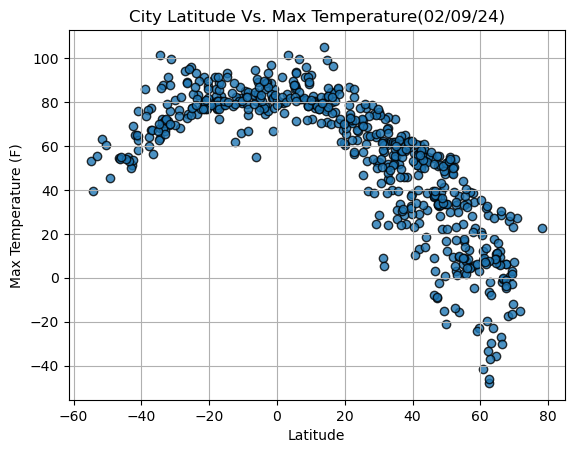

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

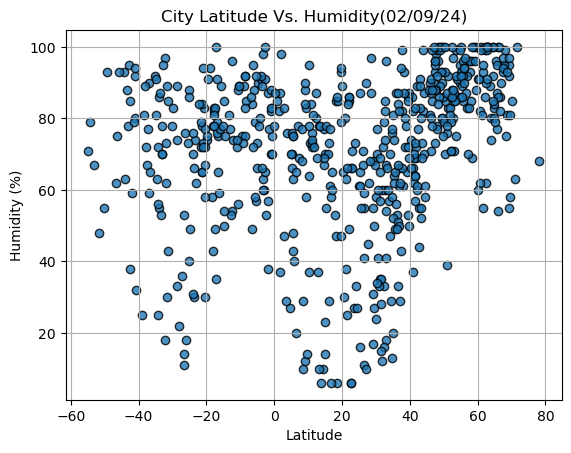

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

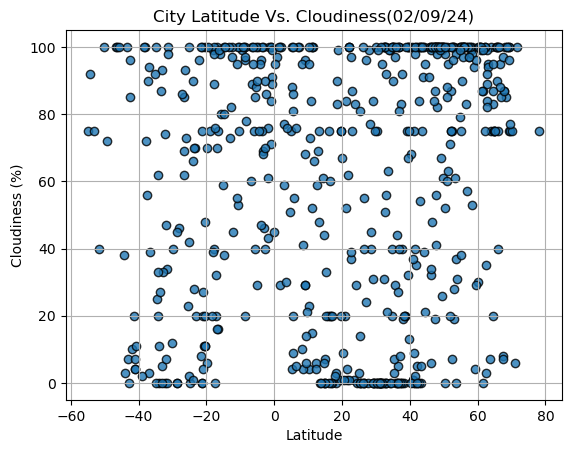

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

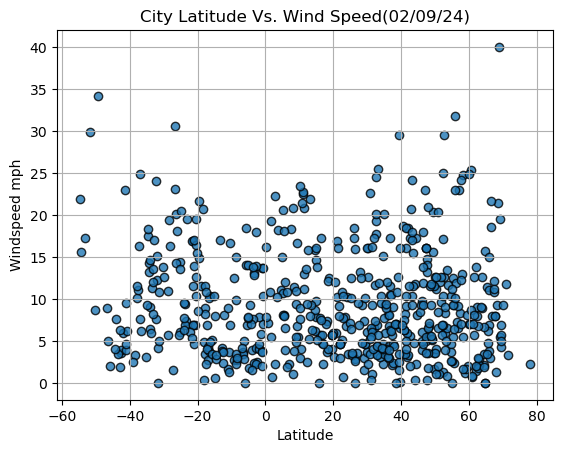

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots

#********* HELP

def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,tolga,34.7222,5.3785,72.27,13,100,15.14,DZ,1707498514
5,ribeira brava,32.6500,-17.0667,73.00,82,100,17.69,PT,1707498514
7,sarmanovo,55.2553,52.5891,2.08,93,100,12.44,RU,1707498515
8,roma,43.2128,-75.4557,56.82,52,100,10.36,US,1707498515
11,brezina,33.0989,1.2608,61.81,18,100,25.50,DZ,1707498515


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,45.61,93,72,34.20,TF,1707498513
1,port elizabeth,-33.9180,25.5701,72.10,86,11,8.99,ZA,1707498514
2,new norfolk,-42.7826,147.0587,51.30,95,0,1.92,AU,1707498514
4,yaren,-0.5472,166.9160,82.62,75,91,10.36,NR,1707498514
6,puerto natales,-51.7236,-72.4875,63.05,48,40,29.93,CL,1707498515


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8504910819486083


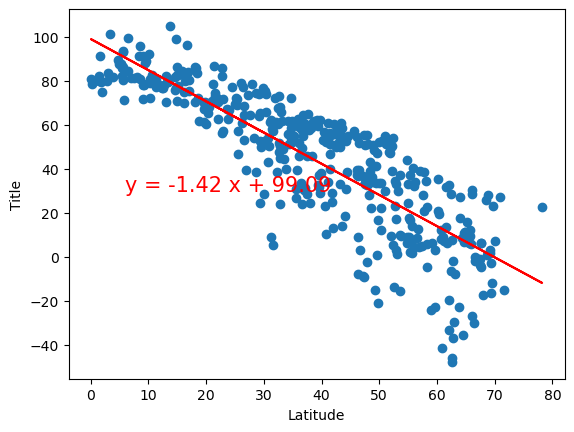

In [49]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.6027984421155146


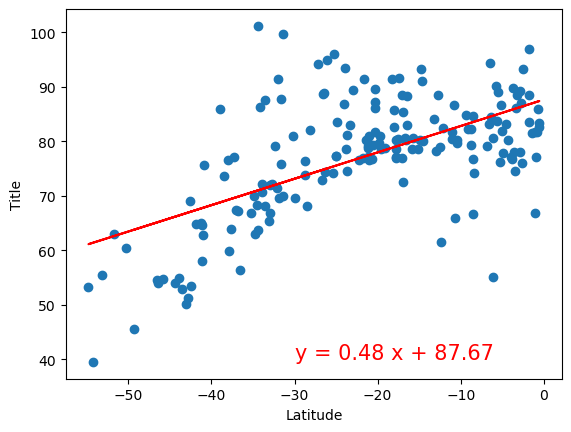

In [39]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4791071904376703


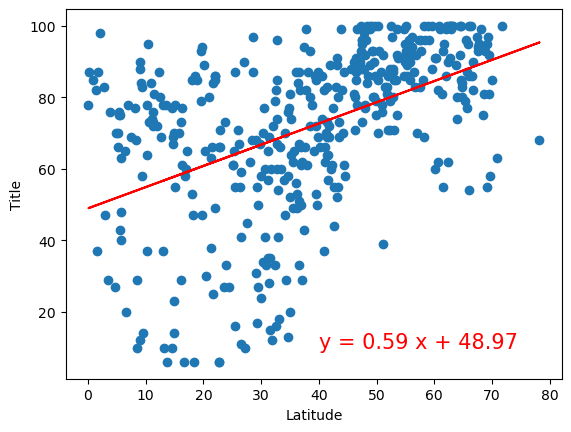

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.1374818222660593


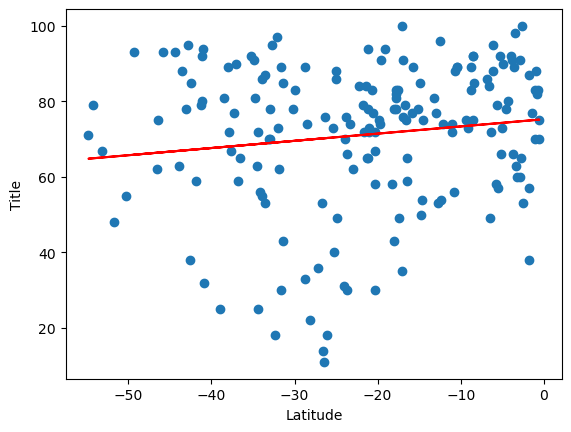

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.3210113829157357


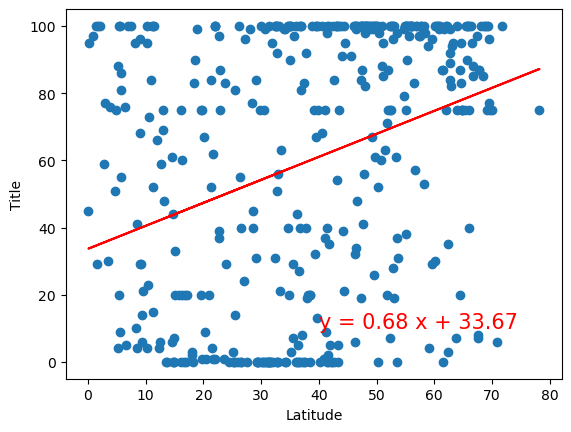

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.30601134527506796


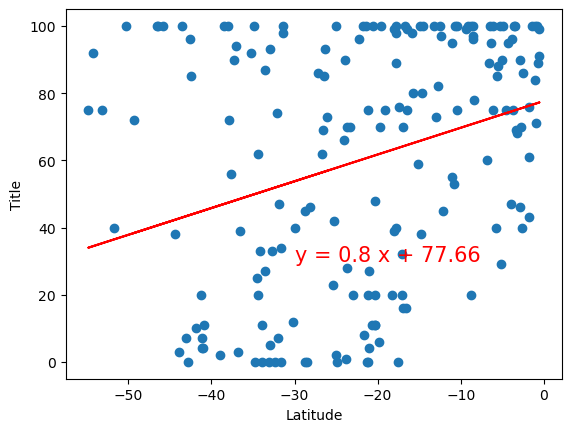

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.041902037386996674


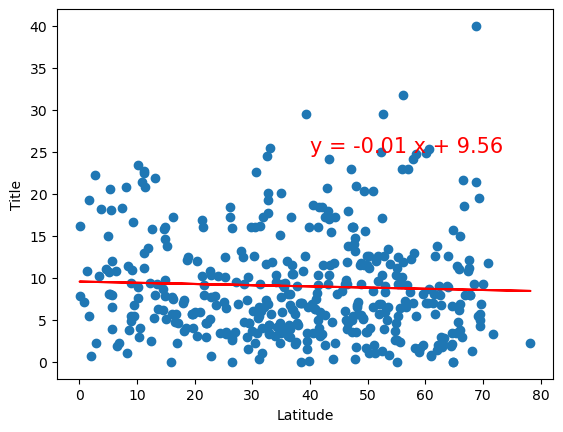

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.27352207531734757


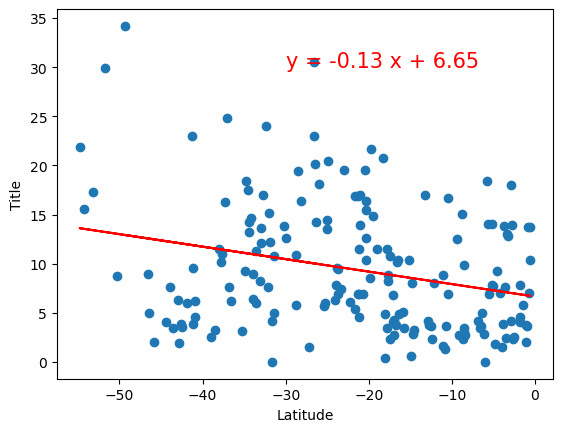

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE